# Election Results and Campgain Finances

## Spring 2022 INFO 1998 Final Project
Author: Victoria Baker (vb272)

### Introduction

What impacts do campaign spending and fundraising have on elections? Given an FEC dataset, with what degree of accuracy could we have predicted the election results? These are the questions we are trying to answer with a Campaign Finance and Election Result dataset from kaggle. 

Dataset Description: 
Each row represents a candidate, with information on their campaign including the state, district, office, total contributions, total expenditures, etc. The content is specific to the year leading up to the 2016 congressional elections: (1/1/2015 through 10/19/2016).

### Acknowledgements: 
The following CSV dataset was obtained under the CC 4.0 free and public use license, as hosted by Kaggle.com and its publishers. 

This dataset can be found here: https://www.kaggle.com/datasets/danerbland/electionfinance

Campaign finance information came directly from FEC.gov.
Election results and vote totals for house races were taken from CNN's election results page.

___________

# Data Investigation

We first import all the necessary packages to properly investigate our dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

We then load the dataset and get some more specific information about what it contains

In [2]:
df = pd.read_csv('CandidateSummaryAction1.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   can_id                 1814 non-null   object 
 1   can_nam                1814 non-null   object 
 2   can_off                1814 non-null   object 
 3   can_off_sta            1814 non-null   object 
 4   can_off_dis            1812 non-null   float64
 5   can_par_aff            1813 non-null   object 
 6   can_inc_cha_ope_sea    1812 non-null   object 
 7   can_str1               1789 non-null   object 
 8   can_str2               122 non-null    object 
 9   can_cit                1813 non-null   object 
 10  can_sta                1806 non-null   object 
 11  can_zip                1789 non-null   float64
 12  ind_ite_con            1570 non-null   object 
 13  ind_uni_con            1538 non-null   object 
 14  ind_con                1616 non-null   object 
 15  par_

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,"$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,"$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,"$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",NaN,1/1/2015,10/19/2016,Y,277390.0


As we can see, there are a lot of different features in this dataset! We list them below:
- can_id: 
_Id of the candidate generated using the candidate's congressional district and state_

- can_nam:
_Candidate's name_

- can_off:
_What office the candidate is running for (H for house, S for senate, P for President)_

- can_off_sta:
_What state the candidate is running in_

- can_off_dis:
_What congressional district the candidate is running in (if House candidate)_

- can_par_aff:
_Candidate party affiliation (Dem = Democrat, Rep = Republican)_

- can_inc_cha_ope_sea: 
_Indicates whether candidate is an incumbent, challenger, or open seat_

- can_str1:
_Candidate's campaigan address_

- can_str2:
_Second line for candidate's campaigan address if applicable_

- can_cit:
_City of candidate's campaigan address_

- can_sta:
_State of candidate's campaigan address_

- can_zip:
_Zip code of candidate's campaigan address_

- ind_ite_con:
_Sum of itemized contributions from individuals_

- ind_uni_con:
_Sum of unitemized contributions from individuals_

- ind_con:
_Total contributions from individuals_

- par_com_con:
_Contributions from party committees_

- oth_com_con:
_Contributions from other committees_

- can_con:
_Contributions from the candidate_

- tot_con:
_Total contributions_

- tra_fro_oth_aut_com:
_Monetary transfer from other authorized committee (such as a joint fundraising committee)_
 
- can_loa:
_Loans received from the candidate_

- oth_loa:
_Other loans_

- tot_loa:
_Total loans_

- off_to_ope_exp:
_Offsets to operating expenditure (eg: e.g. refund of deposit for phone bank, etc.) _

- off_to_fun:
_Offsets to fundraising (applies only to Presidential candidates)_

- off_to_leg_acc:
_Offsets to legal accounting (applies only to Presidential candidates)_ 

- oth_rec:
_Other receipts (E.g. interest on bank deposits, capital gains, etc.)_

- tot_rec:
_Sum of all receipt categories

- ope_exp:
_Total of normal operating expenditures_

- exe_leg_acc_dis:
_Applies only for Presidential candidates receiving public matching funds in the primaries_

- fun_dis:
_Applies only for Presidential candidates receiving public matching funds in the primaries_

- tra_to_oth_aut_com:
_Transfer to other authorized committee_

- can_loa_rep:
_Loan repayments to the candidate_

- oth_loa_rep:
_Loan repayments to banks or others_

- tot_loa_rep:
_Total loan repayment_

- ind_ref:
_Individual refund_

- par_com_ref:
_Party committee refund_

- oth_com_ref:
_Other committee refund_

- tot_con_ref:
_Total contribution refund_

- oth_dis:
_Other disbursement (e.g. donations to charity, contributions to state or local candidates, etc.)_

- tot_dis:
_Total disbursement_

- cas_on_han_beg_of_per:
_Cash on hand beginning of period (cash balance for the campaign at the start of the two-year period)_

- cas_on_han_clo_of_per:
_Cash on hand close of period_

- net_con:
_Sum of all contributions minus any contribution refunds_

- net_ope_exp:
_Sum of all operating expenditures minus any offsets to those expenditures_

- deb_owe_by_com:
_Debt owed by committees_

- deb_owe_to_com:
_Debt owed to committee_

- cov_sta_dat:
_Beginning date for the first report during the two year period_

- cov_end_dat:
_End date for the last report during the two year period_

- winner: "Y" or ""
_Whether the candidate won the election_

- votes:
_How many votes the candidate recieved_


# Cleaning the Data

We saw above that not all of the data that we have is necessary for our purposes. We want to investigate all the candidates who are running for house seats. Let's start by getting rid of all the candidates who are runnng for the senate or presidency. 

In [3]:
house = df.loc[(df['can_off']== 'H')]
house.head()

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,"$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,"$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,"$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",NaN,1/1/2015,10/19/2016,Y,277390.0


There are a few columns that are only applicable to presidential candidates, so we can get rid of those too. 

In [4]:
house = house.drop(["exe_leg_acc_dis", "fun_dis", "off_to_fun", "off_to_leg_acc"], axis=1)

Now that we're thinking about what we don't need, let's drop all the columns dealing with the candidate's name and address, because we are concerned about the financial data.

In [5]:
house = house.drop(["can_str1", "can_str2", "can_cit", "can_zip", "can_id", "can_nam", "can_off", "cov_sta_dat", "cov_end_dat"], axis=1)

We have a lot of NaN values, which is generally undesirable. Unfortunately, most of these values we can't fill in. What we can fill in is the winner column, because if a candidate didn't win, they lost. We will fill the winner column in substituting 1 for "Y" and 0 for the NaN values. 

In [6]:
house['winner']=house['winner'].fillna(0)

In [7]:
house['winner'] = house['winner'].replace("Y", 1)
house.head()

,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_sta,ind_ite_con,ind_uni_con,ind_con,par_com_con,oth_com_con,...,oth_dis,tot_dis,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,winner,votes
0,GA,12.0,REP,INCUMBENT,GA,"$554,305.00","$46,969.50","$601,274.50",NaN,"$473,675.00",...,"$70,000.00","$978,518.98","$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1,158708.0
1,PA,2.0,DEM,CHALLENGER,PA,"$1,042,280.38","$72,430.64","$1,114,711.02",NaN,"$302,834.20",...,"$2,200.00","$1,313,583.69",NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,1,310770.0
2,FL,4.0,REP,OPEN,FL,"$529,030.38","$13,075.00","$542,105.38",NaN,"$106,050.00",...,"$19,000.00","$675,642.76",NaN,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",NaN,1,286018.0
3,MT,0.0,REP,INCUMBENT,MT,"$2,479,616.45","$1,837,715.13","$4,317,331.58","$3,545.32","$660,038.51",...,"$43,548.00","$5,200,630.00","$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",NaN,NaN,1,280476.0
4,CA,13.0,DEM,INCUMBENT,CA,"$746,233.93","$150,889.68","$897,123.61",NaN,"$308,740.00",...,"$150,540.00","$1,112,163.94","$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",NaN,1,277390.0


We also have quite a few monetary values that should be converted to floats so that we cna perform mathematical operations on them. We do this below

In [8]:
house['ind_ite_con'] = house['ind_uni_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['ind_uni_con'] = house['ind_uni_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['ind_con'] = house['ind_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['par_com_con'] = house['par_com_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['oth_com_con'] = house['oth_com_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['can_con'] = house['can_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tot_con'] = house['tot_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tra_fro_oth_aut_com'] = house['tra_fro_oth_aut_com'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['can_loa'] = house['can_loa'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['oth_loa'] = house['oth_loa'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tot_loa'] = house['tot_loa'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['off_to_ope_exp'] = house['off_to_ope_exp'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['oth_rec'] = house['oth_rec'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tot_rec'] = house['tot_rec'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['ope_exp'] = house['ope_exp'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tra_to_oth_aut_com'] = house['tra_to_oth_aut_com'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['can_loa_rep'] = house['can_loa_rep'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['oth_loa_rep'] = house['oth_loa_rep'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tot_loa_rep'] = house['tot_loa_rep'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['ind_ref'] = house['ind_ref'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['par_com_ref'] = house['par_com_ref'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['oth_com_ref'] = house['oth_com_ref'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tot_con_ref'] = house['tot_con_ref'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['oth_dis'] = house['oth_dis'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['tot_dis'] = house['tot_dis'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['cas_on_han_beg_of_per'] = house['cas_on_han_beg_of_per'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['cas_on_han_clo_of_per'] = house['cas_on_han_clo_of_per'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['net_con'] = house['net_con'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['net_ope_exp'] = house['net_ope_exp'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['deb_owe_by_com'] = house['deb_owe_by_com'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)
house['deb_owe_to_com'] = house['deb_owe_to_com'].replace({'\$': '', ',': '', '\(': '', '\)': ''}, regex=True).astype(float)


In [9]:
house.fillna(0)

,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_sta,ind_ite_con,ind_uni_con,ind_con,par_com_con,oth_com_con,...,oth_dis,tot_dis,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,winner,votes
0,GA,12.0,REP,INCUMBENT,GA,46969.50,46969.50,601274.50,0.00,473675.00,...,70000.0,978518.98,60109.57,175613.35,1074949.50,907156.21,1125000.00,0.0,1,158708.0
1,PA,2.0,DEM,CHALLENGER,PA,72430.64,72430.64,1114711.02,0.00,302834.20,...,2200.0,1313583.69,0.00,105687.23,1406719.06,1298831.83,0.00,0.0,1,310770.0
2,FL,4.0,REP,OPEN,FL,13075.00,13075.00,542105.38,0.00,106050.00,...,19000.0,675642.76,0.00,35645.09,650855.38,656210.29,60000.00,0.0,1,286018.0
3,MT,0.0,REP,INCUMBENT,MT,1837715.13,1837715.13,4317331.58,3545.32,660038.51,...,43548.0,5200630.00,83815.78,399122.61,4938943.74,5055942.15,0.00,0.0,1,280476.0
4,CA,13.0,DEM,INCUMBENT,CA,150889.68,150889.68,897123.61,0.00,308740.00,...,150540.0,1112163.94,83690.60,181338.23,1197676.61,949488.98,4401.75,0.0,1,277390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,NY,11.0,GRE,OPEN,NY,8489.00,8489.00,12889.00,0.00,0.00,...,0.0,13983.11,0.00,257.89,14241.00,13356.89,0.00,0.0,0,0.0
1794,MS,1.0,REP,OPEN,MS,9463.41,9463.41,95538.35,0.00,6500.00,...,0.0,247121.35,0.00,0.00,102538.35,247121.35,0.00,0.0,0,0.0
1800,MS,1.0,REP,OPEN,MS,952.00,952.00,25808.00,0.00,0.00,...,0.0,538358.00,0.00,0.00,140858.00,528638.39,0.00,0.0,0,0.0
1812,AS,0.0,DEM,0,AS,1500.00,1500.00,20555.00,8215.00,0.00,...,0.0,38167.44,1058.44,4561.00,41670.00,38167.44,0.00,0.0,0,0.0


# Data Visualizations

Now that we've cleaned our data, we want to visualize it! Let's start with the looking at the net contributions, and whether campagains with high net contributions tended to win or not. Lets first find the mean of the net campaign contributions, and then use that to group campaigns. 

In [10]:
house['net_con'].mean()

617549.745982532

We see that the net contribution mean is $617549.745982532. We therefore group values above this into "higher contribution" campaigns and values below this into "lower contribution campaigns". We then make a pie chart displaying the election results for higher contribution campaigns and lower contribution campaigns.

<ipython-input-11-9c19834bba7f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  loser_high_cont = lost[house['net_con']>= 617549.745982532]
<ipython-input-11-9c19834bba7f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  loser_low_cont = lost[house['net_con']< 617549.745982532]


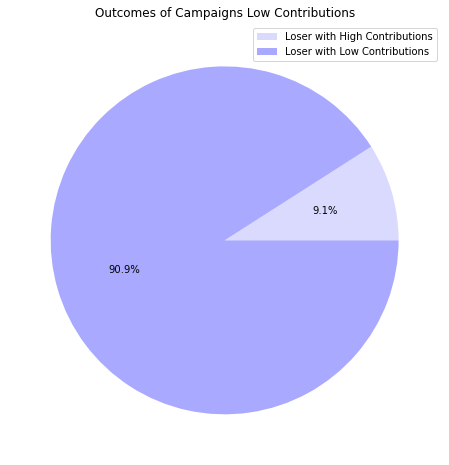

In [11]:
lost = house[house['winner']==0]
loser_high_cont = lost[house['net_con']>= 617549.745982532]
loser_low_cont = lost[house['net_con']< 617549.745982532]

colors = ['#dadafe','#a9a9ff']
plt.pie(x=[len(loser_high_cont), len(loser_low_cont)], colors = colors, autopct='%1.1f%%',)
plt.legend(['Loser with High Contributions', 'Loser with Low Contributions'])
plt.title('Outcomes of Campaigns Low Contributions')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

<ipython-input-12-6eefe8aa316c>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winner_high_cont = won[house['net_con']>= 617549.745982532]
<ipython-input-12-6eefe8aa316c>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  winner_low_cont = won[house['net_con']< 617549.745982532]


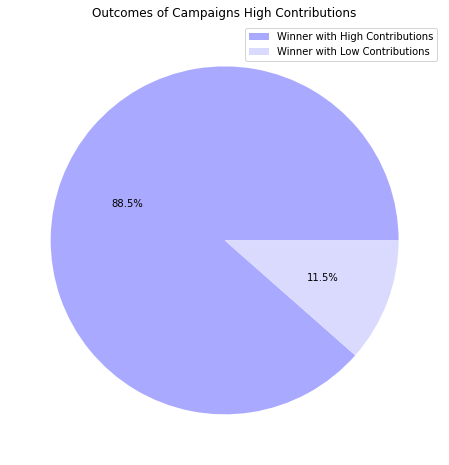

In [12]:
won = house[house['winner']==1]
winner_high_cont = won[house['net_con']>= 617549.745982532]
winner_low_cont = won[house['net_con']< 617549.745982532]
colors = ['#a9a9ff','#dadafe']
plt.pie(x=[len(winner_high_cont), len(winner_low_cont)], colors = colors, autopct='%1.1f%%',)
plt.legend(['Winner with High Contributions', 'Winner with Low Contributions'])
plt.title('Outcomes of Campaigns High Contributions')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

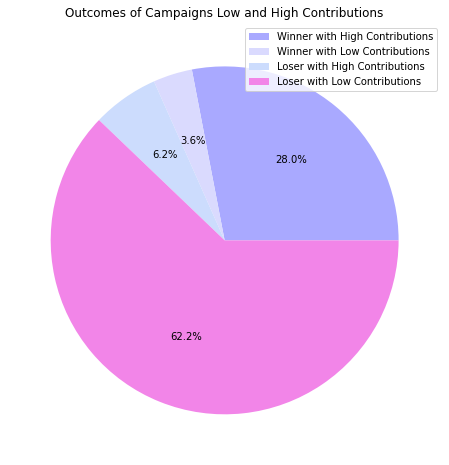

In [13]:
colors = ['#a9a9ff','#dadafe', '#CCDCFD', '#F285E8']
plt.pie(x=[len(winner_high_cont), len(winner_low_cont), len(loser_high_cont), len(loser_low_cont)], colors = colors, autopct='%1.1f%%',)
plt.legend(['Winner with High Contributions', 'Winner with Low Contributions','Loser with High Contributions', 'Loser with Low Contributions'])
plt.title('Outcomes of Campaigns Low and High Contributions')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

Looking at our pie chart, we see that in general, losing candidates had total contributions lower than the average, while winning candidates at contributions higher than the average. We also see from viewing the last pie chart that there were far more losing candidates than winning ones.

## Heatmap Visualization 

We now want to look at a pairwise heat map to gain an understanding what features are most important to a candidate winning a race.

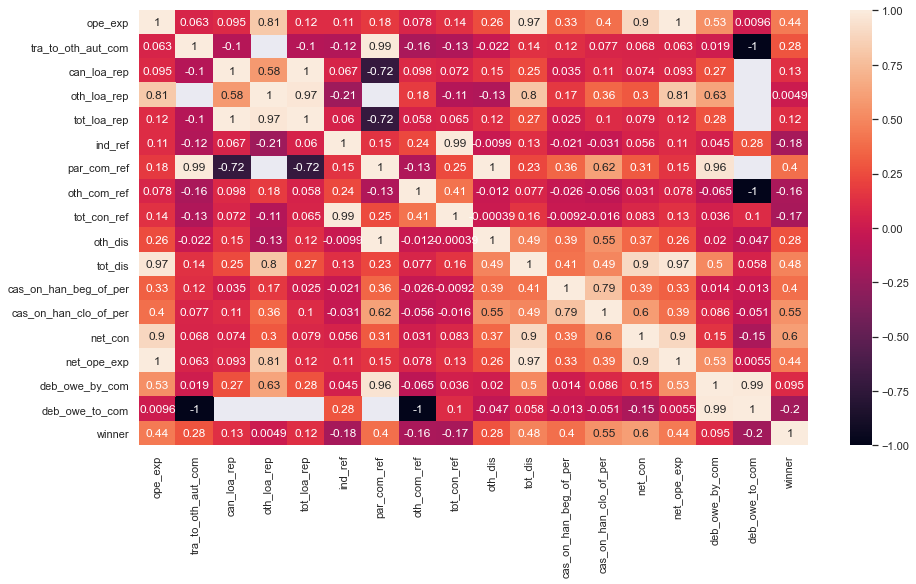

In [14]:
h = house.drop(["can_off_dis", "votes", 'ind_ite_con', 'ind_uni_con', 'ind_con', 'par_com_con', 'oth_com_con', 'can_con', 'tot_con', 'tra_fro_oth_aut_com', 'can_loa', 'oth_loa', 'tot_loa', 'off_to_ope_exp', 'oth_rec', 'tot_rec'], axis=1)
corr = h.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True)
plt.show()

Let's make another heat map using the values we dropped earlier: 

In [15]:
k = house[["can_off_dis", "winner", 'ind_ite_con', 'ind_uni_con', 'ind_con', 'par_com_con', 'oth_com_con', 'can_con', 'tot_con', 'tra_fro_oth_aut_com', 'can_loa', 'oth_loa', 'tot_loa', 'off_to_ope_exp', 'oth_rec', 'tot_rec']]

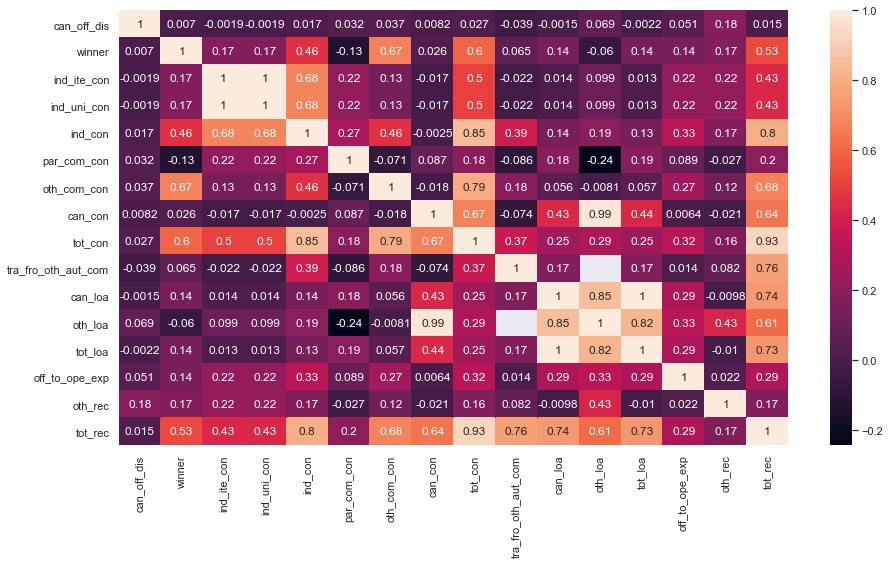

In [16]:
corr = k.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, annot=True)
plt.show()

Looking at the heatmaps, we see that the columns most closely correlated to winning are: 
- oth_com_con:
_Contributions from other committees_
- tot_con:
_Total contributions_
- tot_rec:
_Sum of all receipt categories
- net_con:
_Sum of all contributions minus any contribution refunds_
- cas_on_han_clo_of_per:
_Cash on hand close of period_

We'll be using these features in our machine learning! Now that we know what features we'll be focusing on, let's clean them some more.

In [17]:
house = house[['oth_com_con', 'tot_con', 'tot_rec', 'net_con', 'cas_on_han_clo_of_per', 'winner']]
house.head(60)

,oth_com_con,tot_con,tot_rec,net_con,cas_on_han_clo_of_per,winner
0,473675.00,1074949.50,1094022.76,1074949.50,175613.35,1
1,302834.20,1417545.22,1419270.92,1406719.06,105687.23,1
2,106050.00,650855.38,711287.85,650855.38,35645.09,1
3,660038.51,4980915.41,5190887.78,4938943.74,399122.61,1
4,308740.00,1205863.61,1209811.57,1197676.61,181338.23,1
5,399750.00,728854.52,733716.61,725854.52,274287.84,1
6,576645.00,970547.37,970574.37,970385.04,412220.80,1
7,325220.00,1092269.56,1097115.11,1092218.56,1010654.62,1
8,2042913.61,3012350.64,3134128.86,3004650.64,1264468.82,1
9,859775.00,2797967.38,3011173.93,2784362.26,2858165.71,1


As we can see, there are still a few NaN values in these columns. That's okay! We drop the rows containing NaN values below

In [18]:
house = house.dropna(axis='rows', how='any')

In [19]:
house.head(60)

,oth_com_con,tot_con,tot_rec,net_con,cas_on_han_clo_of_per,winner
0,473675.00,1074949.50,1094022.76,1074949.50,175613.35,1
1,302834.20,1417545.22,1419270.92,1406719.06,105687.23,1
2,106050.00,650855.38,711287.85,650855.38,35645.09,1
3,660038.51,4980915.41,5190887.78,4938943.74,399122.61,1
4,308740.00,1205863.61,1209811.57,1197676.61,181338.23,1
5,399750.00,728854.52,733716.61,725854.52,274287.84,1
6,576645.00,970547.37,970574.37,970385.04,412220.80,1
7,325220.00,1092269.56,1097115.11,1092218.56,1010654.62,1
8,2042913.61,3012350.64,3134128.86,3004650.64,1264468.82,1
9,859775.00,2797967.38,3011173.93,2784362.26,2858165.71,1


# Machine Learning 

This dataset is suited towards classification models, because we are trying to predict whether a candidate won or lost. 

## KNN Classifier 
We first use a KNN classifier, because it is a simple and widely used classification algorithm. It works by splitting data rnadomly into train and test sets that classify new data points based on their similarity to neighboring groups off datapoints.

In [20]:
X=house.drop(['winner'], axis=1)
Y=house['winner']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1998) #20% for testing and 80% for training is a common split
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, knn_pred_test))

Train Accuracy:  0.9530516431924883
Test Accuracy:  0.9125


That's some nice accuracy! We have a 95% training accuracy and a 91% testing accuracy. Let's use a confusion matrix to tune our model. A confusion matrix is a table used to define the performance of a classification algorithm. It visualizes and summarizes the performance of the algorithm so that we can improve it.

In [21]:
#Validate and tune 
true_neg, false_pos, false_neg, true_pos = confusion_matrix(Y_test, knn.predict(X_test)).ravel()
(true_neg+true_pos)/(true_neg+true_pos+false_pos+false_neg)

0.9125

We can use this confusion matrix to analyze our model. 

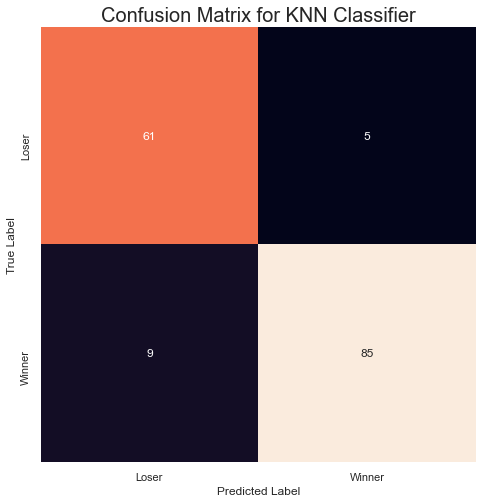

In [22]:
plt.figure()
matrix = confusion_matrix(Y_test, knn.predict(X_test))
sns.heatmap(matrix, annot=True, cbar=False, square=True, xticklabels=['Loser', 'Winner'], yticklabels=['Loser', 'Winner'] )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for KNN Classifier', fontsize = 20)
plt.show()

As we can see from the confusion matrix, we correctly predicted 85 of the 94 winners and 61 of the 66 losers. However, our model predicted that 9 candidates would lose when they actually won, and that 5 candidates would win when they actually lost. 

## Decision Tree


We will now build a decision tree classifier. Decision Trees are a non-parametric supervised learning method used for both classification and regression! In this case, we'll be using it for classification. We want to predict the value of a target variable by learning simple decision rules inferred from the data features.


In [23]:
#Create the DT Classifier
from sklearn import tree
from sklearn import datasets
model=tree.DecisionTreeClassifier(max_depth=5)

#Train the model
model.fit(X_train,Y_train)

#Calculate the train and test accuracy
dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

Train Accuracy:  0.9624413145539906
Test Accuracy:  0.875


We see that our accuracy isn't too far off from what we had using KNN classification. Our Test accuracy is lower while our train accuracy is a little higher. Let's build another confusion matrix to see how our model did. 

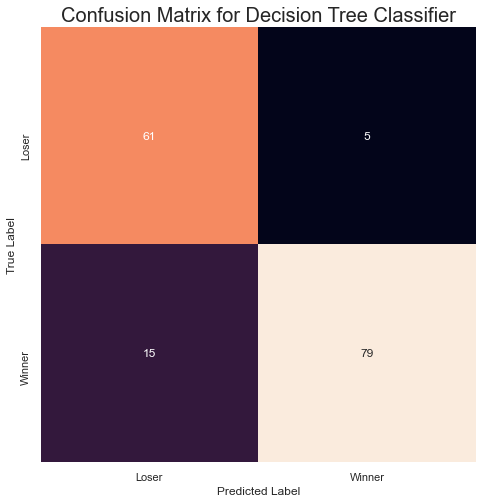

In [24]:
plt.figure()
matrix = confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(matrix, annot=True, cbar=False, square=True, xticklabels=['Loser', 'Winner'], yticklabels=['Loser', 'Winner'] )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Decision Tree Classifier', fontsize = 20)
plt.show()

As we can see from the confusion matrix, we correctly predicted 80 of the 94 winners and 62 of the 66 losers. However, our model predicted that 14 candidates would lose when they actually won, and that 6 candidates would win when they actually lost. We correctly predicted more losers using a Decision Tree rather than a KNN classifier, but we also incorrectly predictd more winners. 

## Random Forest

The Random Forest Algorithm combines the output of multiple (randomly created) Decision Trees to generate the final output. This can be desirable if a single tree is not sufficent to produce effective results. Let's see what we get using a random forest! 

In [25]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

pred_train = forest.predict(X_train)
pred_test = forest.predict(X_test)

print("Training Accuracy: ", accuracy_score(Y_train, pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, pred_test))


Training Accuracy:  1.0
Test Accuracy:  0.91875


As we can see from our results, it does not drastically improve our performance to use multiple decision trees. Generally, random forests are used for very large datasets, and the dataset we are using is not particulary large. 

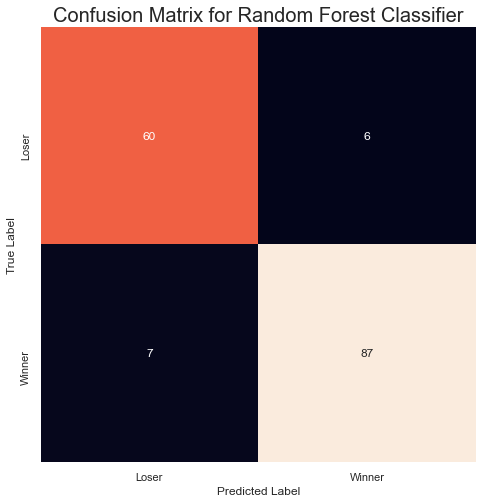

In [26]:
plt.figure()
matrix = confusion_matrix(Y_test, forest.predict(X_test))
sns.heatmap(matrix, annot=True, cbar=False, square=True, xticklabels=['Loser', 'Winner'], yticklabels=['Loser', 'Winner'] )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Random Forest Classifier', fontsize = 20)
plt.show()

## Perceptron

Perceptron is an iterative linear binary classifier. This works for our dataset because we are classifying candidates as winners or losers! 

In [27]:
from sklearn.linear_model import Perceptron
classifier = Perceptron()
classifier.fit(X_train, Y_train)
pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test) 
print("Training Accuracy: ", accuracy_score(Y_train, pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, pred_test))

Training Accuracy:  0.8294209702660407
Test Accuracy:  0.81875


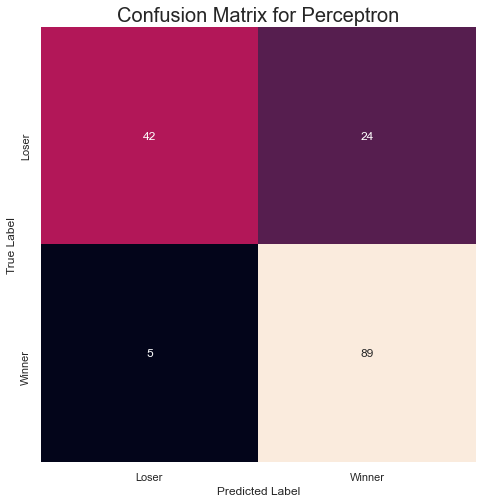

In [28]:
plt.figure()
matrix = confusion_matrix(Y_test, classifier.predict(X_test))
sns.heatmap(matrix, annot=True, cbar=False, square=True, xticklabels=['Loser', 'Winner'], yticklabels=['Loser', 'Winner'] )
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for Perceptron', fontsize = 20)
plt.show()

Our Perceptron classifier was not very accurate (test accuracy of ~ 81%). It performed the worst when predicting winners: although it correctly predicted 89 winners, it incorrectly predicted that 24 candidates would win when they actually lost.

# Conclusion

We make a chart showing the test accuracies of our models to determine which one was the best at predicting which candidates would win or lose. 

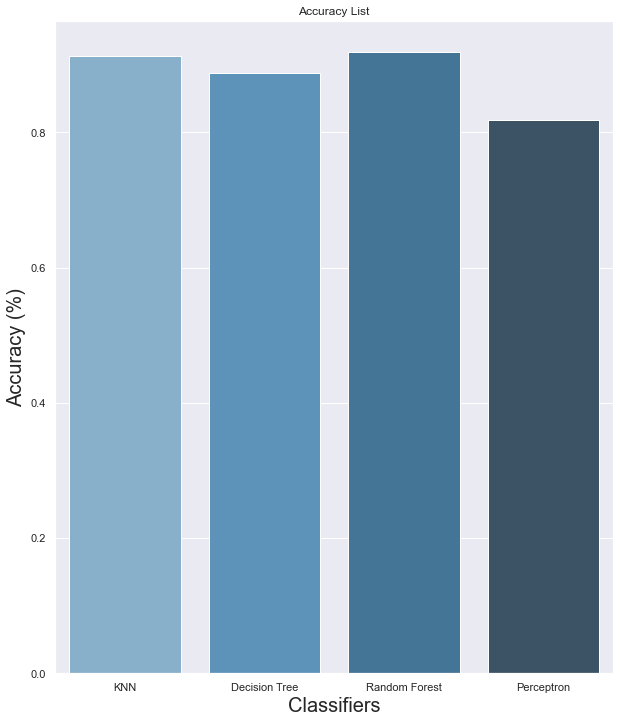

In [29]:
classifiers = ["KNN","Decision Tree","Random Forest", "Perceptron"]
accuracy = [0.9125, 0.8875, 0.91875, 0.81875]
plt.figure(figsize=(10,12))
brplt = sns.barplot(x=classifiers, y=accuracy, palette="Blues_d")
plt.xlabel("Classifiers", fontsize=20)
plt.ylabel("Accuracy (%)", fontsize=20)
plt.title("Accuracy List")
plt.show()

Overall, the KNN and Random Forest models were the most accurate (~91%) for classifying candidates as winners and losers. We were able to build these classifiers by cleaning our data and determining which attributes were most correlated with winning the election. Using a heat map, we found that they were: contributions from other committees, total contributions, sum of all receipt categories, sum of all contributions minus any contribution refunds, and the cash the campaign had on hand at the close of the election period. We randomly split the data and ran machine learning models on them, finding that the features we chose were correlated to election outcome. 

Looking at the features we chose, our result makes sense. A candidate with a high total of contributions will have more money with which to support his campaign. Contributions from committess (not individuals) outside of a candidates party tend to be larger than contributions made by individuals, so it also is reasonable that those would be corelated to a candidate's success. The amount of cash the campaign had on hand at the close of the election period is indicitave of how much the campaign had to spend: if the campaign had a large number of contributions, they could perhaps not exhaust all of their funds by the end of the election. 

In the future, this project could be expanded to include analysis of each candidate's state and district. Because we are looking at house candidates as a whole in this notebook, there are some areas where we gloss over the differences faced by candidates in each state. For example, a Republican candidate in a Republican state will likely not spend as much money as a Republican candidate in a toss-up (purple) state when running for office, because the likehood the Republican will win in the red state is much higher. By considering these nuances when building our model, we could yield more applicable and interesting results in the future.

